In [1]:
#this project for bank users 
#the proble ("""""""""")

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import bartlett
from scipy.stats import pointbiserialr

In [91]:
df = pd.read_csv('Churn Modeling.csv')

In [92]:
#understanding the data set 

In [93]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [95]:
df.shape

(10000, 14)

In [96]:
df.size

140000

In [97]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [98]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [99]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<Figure size 1000x700 with 0 Axes>

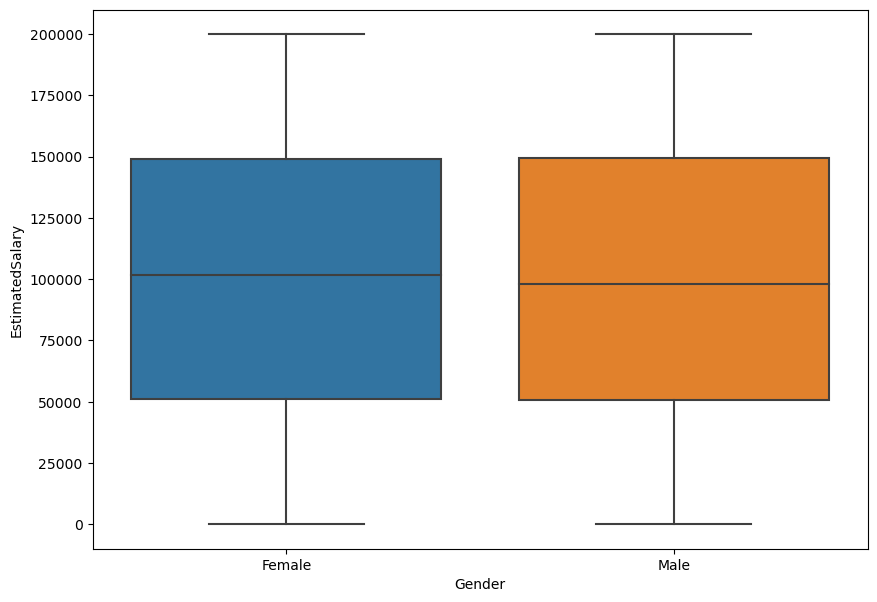

In [100]:
fig = plt.figure(figsize =(10, 7))
np.random.seed(10)
 
fig = plt.figure(figsize =(10, 7))
sns.boxplot(y='EstimatedSalary', x='Gender', data=df)
plt.show()

In [86]:

femaleG = df.query('Gender == "Female"')['EstimatedSalary']
maleG = df.query('Gender == "Male"')['EstimatedSalary']

# Get the results:
print(shapiro(femaleG))
print(shapiro(maleG))

# P-Value larger than 0.05 then estimated salary normally distributed for each category of gender
# Null Hypothesis: the variances are equal across all samples/groups

ShapiroResult(statistic=0.9576818943023682, pvalue=1.953964107121905e-34)
ShapiroResult(statistic=0.955511748790741, pvalue=7.016583912644767e-38)


In [103]:
stat1=stats.levene(femaleG, maleG)

print(stat1)
# P-Value larger than 0.05 then estimated salary equal variances for each category of gender

LeveneResult(statistic=0.5105595621897275, pvalue=0.4749134083711595)


In [89]:
df=df.replace('Female',0)
df=df.replace('Male',1)


salary = df['EstimatedSalary']
gender = df['Gender']
pbc = pointbiserialr(gender, salary)
print(pbc)


PointbiserialrResult(correlation=-0.008112338913542995, pvalue=0.41728193129711283)
